# MLS 1 CASE STUDY - CNNs

CIFAR-10 Dataset

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix


# Load CIFAR 10 Dataset

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Overview

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
nClasses = 10

classes = ["airplane",'automobile','bird','cat','deer',
'dog','frog','horse','ship','truck']

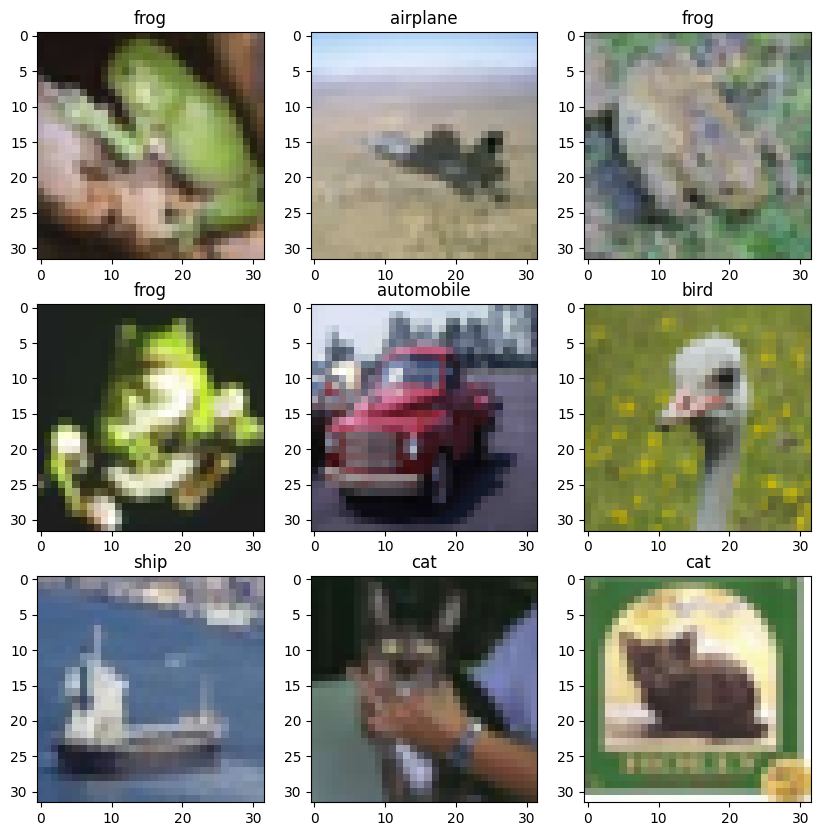

In [5]:
rows, cols = 3,3
fig=plt.figure(figsize=(10,10))
for i in range(cols):
    for j in range(rows):
        rand_ind = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i* rows + j +1)
        ax.imshow(X_train[rand_ind, :])
        ax.set_title(classes[y_train[rand_ind, 0]])

# Data Preperation

#### RGB 0-255 -> 0-1

In [6]:
X_train_norm = X_train/255
X_test_norm = X_test/255

#### One Hot Encoding

In [7]:
y_train_encode = tf.keras.utils.to_categorical(y_train)
y_test_encode = tf.keras.utils.to_categorical(y_test)

# Model

#### CNN

- Conv2D Layers
    - Padding = 'same'
    - ReLU Activation
- Flattened 2 Layer
    - Dropout 0.1
    - Batch Normalization
- Output
    - 10 Classes
    - Softmax Activation
- Optimizer: Adam
- Loss Function: Entropy

In [8]:
np.random.seed(42)

tf.random.set_seed(42)

In [9]:
# TensorFlow Keras Sequential Model
model = Sequential()

# Feature Extraction

# Input Layer
model.add(Conv2D(64, (3, 3), activation='relu',
          padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))

# Convolution+Pooling Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Prediction
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = Adam()

# Output Layer
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

#### Fit Model 

In [12]:
history = model.fit(
    X_train_norm, 
    y_train_encode,
    epochs=30,
    validation_split=0.2
)

Epoch 1/30
1250/1250 [==============================] - 16s 6ms/step - loss: 1.7737 - accuracy: 0.3206 - val_loss: 1.8535 - val_accuracy: 0.3180
Epoch 2/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4416 - accuracy: 0.4558 - val_loss: 1.6867 - val_accuracy: 0.3995
Epoch 3/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3109 - accuracy: 0.5125 - val_loss: 1.7441 - val_accuracy: 0.3968
Epoch 4/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2337 - accuracy: 0.5471 - val_loss: 1.1963 - val_accuracy: 0.5534
Epoch 5/30
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1637 - accuracy: 0.5793 - val_loss: 1.4739 - val_accuracy: 0.4736
Epoch 6/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1093 - accuracy: 0.6002 - val_loss: 1.2164 - val_accuracy: 0.5655
Epoch 7/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0643 - accuracy: 0.6172 - val_loss: 1.0441 - val_accuracy

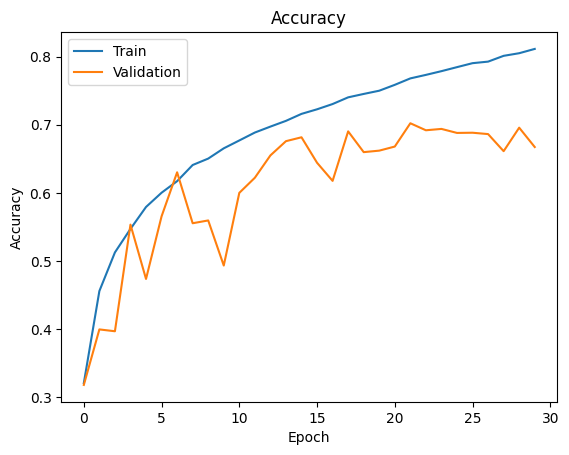

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [14]:
model.evaluate(X_test_norm, y_test_encode)

313/313 [==============================] - 1s 3ms/step - loss: 1.1507 - accuracy: 0.6678


[1.1507488489151, 0.6678000092506409]

In [15]:
highest_acc = max(history.history['val_accuracy'])
highest_epoch = 0

In [16]:
for i,v in enumerate(history.history['val_accuracy']):
    print(f"Epoch: {i+1}")
    print(f"Accuracy Score: {v}")
    if v==highest_acc:
        highest_epoch=i+1

Epoch: 1
Accuracy Score: 0.3179999887943268
Epoch: 2
Accuracy Score: 0.3995000123977661
Epoch: 3
Accuracy Score: 0.3968000113964081
Epoch: 4
Accuracy Score: 0.5533999800682068
Epoch: 5
Accuracy Score: 0.47360000014305115
Epoch: 6
Accuracy Score: 0.565500020980835
Epoch: 7
Accuracy Score: 0.6302000284194946
Epoch: 8
Accuracy Score: 0.555400013923645
Epoch: 9
Accuracy Score: 0.559499979019165
Epoch: 10
Accuracy Score: 0.4932999908924103
Epoch: 11
Accuracy Score: 0.6000000238418579
Epoch: 12
Accuracy Score: 0.6222000122070312
Epoch: 13
Accuracy Score: 0.6549999713897705
Epoch: 14
Accuracy Score: 0.6758999824523926
Epoch: 15
Accuracy Score: 0.6815999746322632
Epoch: 16
Accuracy Score: 0.6442000269889832
Epoch: 17
Accuracy Score: 0.6176000237464905
Epoch: 18
Accuracy Score: 0.6902999877929688
Epoch: 19
Accuracy Score: 0.6597999930381775
Epoch: 20
Accuracy Score: 0.6620000004768372
Epoch: 21
Accuracy Score: 0.6679999828338623
Epoch: 22
Accuracy Score: 0.7021999955177307
Epoch: 23
Accuracy Sc

In [17]:

print(f"Highest Accuracy: {highest_acc}\nEpoch: {highest_epoch}")

Highest Accuracy: 0.7021999955177307
Epoch: 22


# Model 2

In [143]:
# TensorFlow Keras Sequential Model
model_2 = Sequential()

# Feature Extraction

# Input Layer
model_2.add(Conv2D(64, (3, 3), activation='relu',
          padding='same', input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D((2, 2), padding='same'))

# Convolution+Pooling Layers
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), padding='same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), padding='same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2), padding='same'))


# Prediction
model_2.add(Flatten())

model_2.add(Dense(64, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Dense(32, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))

model_2.add(Dense(10, activation='softmax'))

opt = Adam()

# Output Layer
model_2.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [144]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 4, 4, 64)        

In [145]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [146]:
history_2 = model_2.fit(
    X_train_norm, 
    y_train_encode,
    epochs=22,
    validation_split=0.2
)

Epoch 1/22
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8665 - accuracy: 0.3196 - val_loss: 2.0313 - val_accuracy: 0.3345
Epoch 2/22
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4304 - accuracy: 0.4753 - val_loss: 1.7894 - val_accuracy: 0.3893
Epoch 3/22
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2707 - accuracy: 0.5440 - val_loss: 1.6027 - val_accuracy: 0.4352
Epoch 4/22
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1628 - accuracy: 0.5852 - val_loss: 1.0412 - val_accuracy: 0.6229
Epoch 5/22
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0905 - accuracy: 0.6158 - val_loss: 1.2103 - val_accuracy: 0.5879
Epoch 6/22
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0253 - accuracy: 0.6406 - val_loss: 1.0996 - val_accuracy: 0.5985
Epoch 7/22
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9706 - accuracy: 0.6608 - val_loss: 1.2004 - val_accuracy:

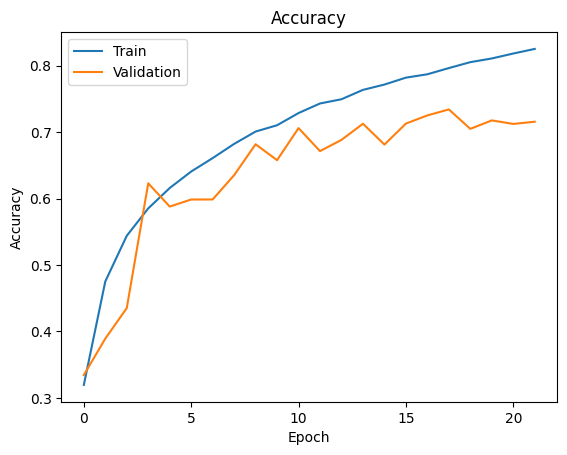

In [147]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [148]:
model_2.evaluate(X_test_norm, y_test_encode)

313/313 [==============================] - 1s 2ms/step - loss: 0.9758 - accuracy: 0.7066


[0.9758355617523193, 0.70660001039505]

In [149]:
highest_acc = max(history_2.history['val_accuracy'])
highest_epoch = 0

In [150]:
for i,v in enumerate(history_2.history['val_accuracy']):
    print(f"Epoch: {i+1}")
    print(f"Accuracy Score: {v}")
    if v==highest_acc:
        highest_epoch=i+1

Epoch: 1
Accuracy Score: 0.3345000147819519
Epoch: 2
Accuracy Score: 0.38929998874664307
Epoch: 3
Accuracy Score: 0.4352000057697296
Epoch: 4
Accuracy Score: 0.6229000091552734
Epoch: 5
Accuracy Score: 0.5878999829292297
Epoch: 6
Accuracy Score: 0.5985000133514404
Epoch: 7
Accuracy Score: 0.5985999703407288
Epoch: 8
Accuracy Score: 0.6351000070571899
Epoch: 9
Accuracy Score: 0.6815999746322632
Epoch: 10
Accuracy Score: 0.6577000021934509
Epoch: 11
Accuracy Score: 0.7059000134468079
Epoch: 12
Accuracy Score: 0.6712999939918518
Epoch: 13
Accuracy Score: 0.6881999969482422
Epoch: 14
Accuracy Score: 0.7124999761581421
Epoch: 15
Accuracy Score: 0.6811000108718872
Epoch: 16
Accuracy Score: 0.7127000093460083
Epoch: 17
Accuracy Score: 0.7250000238418579
Epoch: 18
Accuracy Score: 0.734000027179718
Epoch: 19
Accuracy Score: 0.704800009727478
Epoch: 20
Accuracy Score: 0.7174999713897705
Epoch: 21
Accuracy Score: 0.7121999859809875
Epoch: 22
Accuracy Score: 0.715499997138977


In [151]:
print(f"Highest Accuracy: {highest_acc}\nEpoch: {highest_epoch}")

Highest Accuracy: 0.734000027179718
Epoch: 18


# Making Predictions

In [152]:
y_pred_test = model_2.predict(X_test_norm)

y_pred_test_classes = np.argmax(y_pred_test, axis=1)

y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


#### Visualize Predictions

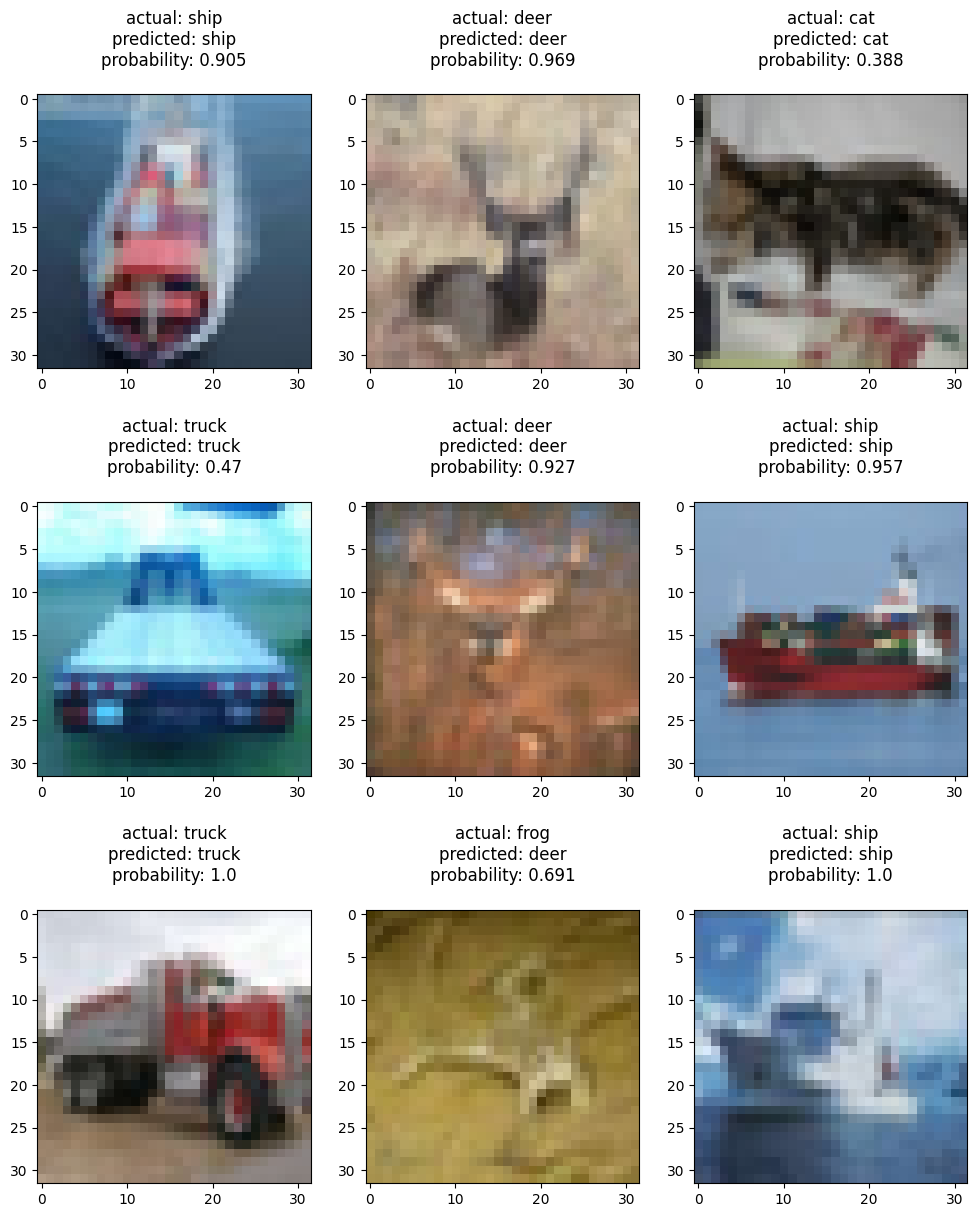

In [158]:
rows, cols = 3,3
fig=plt.figure(figsize=(12,15))
for i in range(cols):
    for j in range(rows):
        rand_ind = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i* rows + j +1)
        ax.imshow(X_test[rand_ind, :])

        pred_label = classes[y_pred_test_classes[rand_ind]]
        pred_proba = y_pred_test_max_probas[rand_ind]
        true_label = classes[y_test[rand_ind, 0]]

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.78      0.87      0.83      1000
           2       0.75      0.47      0.58      1000
           3       0.61      0.41      0.49      1000
           4       0.61      0.69      0.65      1000
           5       0.62      0.62      0.62      1000
           6       0.75      0.80      0.78      1000
           7       0.68      0.80      0.74      1000
           8       0.88      0.74      0.80      1000
           9       0.67      0.88      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



Text(0.5, 25.722222222222214, 'Predicted Values')

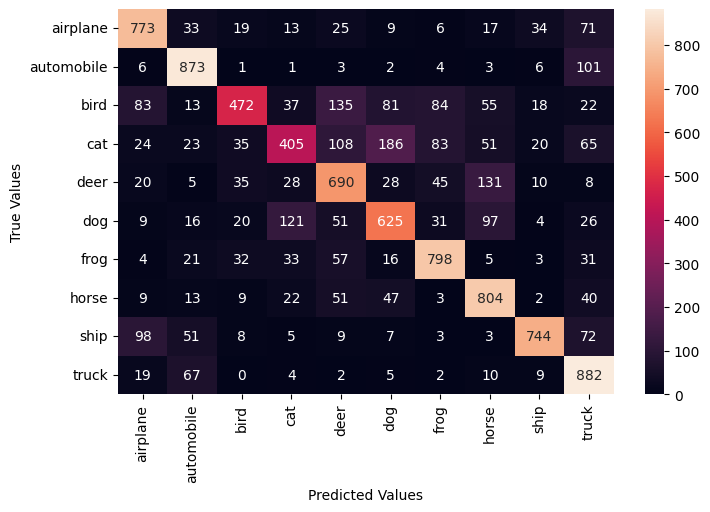

In [154]:
print(classification_report(y_test, y_pred_test_classes))

confusion_mat = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_mat, annot=True, fmt='.0f', xticklabels=classes, yticklabels=classes)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
